In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import display, Math, Latex
import math
pi=math.pi
import cmath

#import scipy
from scipy import special

In [2]:
D=2e-6
rho_p=1040
rho_f=998
k=11.478e-6
R=D/2.
kB=1.381e-23
deltaT=10
T0=293.15
eta=2.414e-5*10**(247.8/(T0-140))
rho_f=0.14395/(0.0112**(1+(1-T0/649.727)**0.05107))
drag=6*pi*eta*R
Diff_const=kB*T0/drag
V_p=4/3.*pi*R**3
M_p=rho_p*V_p
M_f=rho_f*V_p
M_eff=M_p+M_f/2
tau_p=M_p/(6*pi*eta*R)
tau_f=R**2*rho_f/eta
tau_k=drag/k

eta_inf = 0.02984e-3
T_VF = 152
theta = deltaT/(T0-T_VF)

#Thot=T0+deltaT
Thot=T0+5/12*deltaT+math.log(eta/eta_inf)/(22*(T0+deltaT-T_VF))*deltaT**2
etahot=2.414e-5*10**(247.8/(Thot-140))
rho_fhot=0.14395/(0.0112**(1+(1-Thot/649.727)**0.05107))
draghot=6*pi*etahot*R
#Diff_consthot=kB*Thot/drag
M_fhot=rho_fhot*V_p
M_effhot=M_p+M_fhot/2
tau_phot=M_p/(6*pi*etahot*R)
tau_fhot=R**2*rho_fhot/etahot
tau_khot=draghot/k

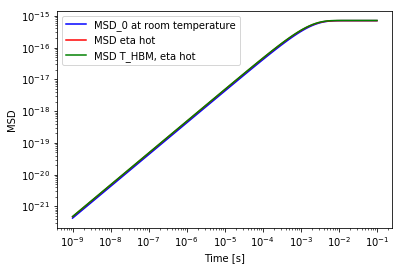

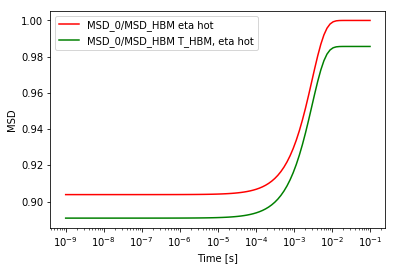

In [3]:
t = np.logspace(-9,-1,num=100)
np.savetxt('MSDtime.txt',np.transpose([t]), newline='\r\n')
Diff_consthot = kB*T0/drag * (1+(193/486*math.log(eta/eta_inf)+1/2*(1-T_VF/T0))*theta-2/3*((56/243-137/486*(1-T_VF/T0))*math.log(eta/eta_inf)-12563/118098*(math.log(eta/eta_inf)**2))*theta**2)

#MSD at room temperature
def MSDtrapcold(t):
    return 2*kB*T0/k*(1-np.exp(-t/tau_k))
    #return 2*kB*T0/k*(1-np.exp(-t/tau_k))

#MSD of heated particle, using T_HBM from Chakraborty
def MSDtraphotTHBM(t):
    return 2*kB*T0/k*(1-np.exp(-t/tau_khot))

#MSD of heated particle, using T_HBM from Chakraborty
def MSDtraphotTHBM2(t):
    return 2*kB*Thot/k*(1-np.exp(-t/tau_khot))

plt.loglog(t, MSDtrapcold(t),'b',label='MSD_0 at room temperature')
plt.loglog(t, MSDtraphotTHBM(t),'r',label='MSD eta hot')
plt.loglog(t, MSDtraphotTHBM2(t),'g',label='MSD T_HBM, eta hot')
plt.xlabel('Time [s]')
plt.ylabel('MSD')
plt.legend()
plt.show()

deltaMSDtrap=MSDtrapcold(t)/MSDtraphotTHBM(t)
deltaMSDtrap2=MSDtrapcold(t)/MSDtraphotTHBM2(t)

plt.semilogx(t, deltaMSDtrap,'r',label='MSD_0/MSD_HBM eta hot')
plt.semilogx(t, deltaMSDtrap2,'g',label='MSD_0/MSD_HBM T_HBM, eta hot')
plt.xlabel('Time [s]')
plt.ylabel('MSD')
plt.legend()
plt.show()

In [10]:
%%latex
\begin{align}
\rm{MSD}_{0}&=&\frac{2k_{B}T_{0}}{k}\cdot \left ( 1-e^{-t/\tau_{k} } \right )\\
\rm{MSD}_{\rm{T_{0}}}&=&\frac{2k_{B} T_{0}}{k}\cdot \left ( 1-e^{-t/\tau_{\rm{k,\rm{hot}}} } \right )\\
\rm{MSD}_{\rm{T}_{HBM}}&=&\frac{2k_{B} T_{\rm{HBM}}}{k}\cdot \left ( 1-e^{-t/\tau_{\rm{k,\rm{hot}}} } \right )
\end{align}

<IPython.core.display.Latex object>

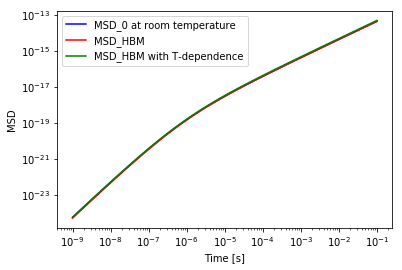

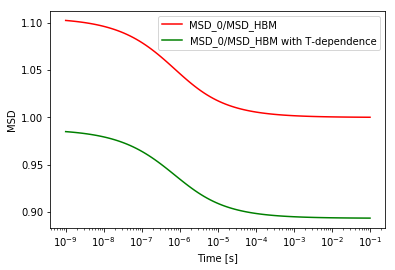

In [11]:
#MSD hydro
def MSDhydrocold(t):
    imagsqrt = complex(0, np.sqrt(-(5-36*tau_p/tau_f)))
    imagsqrt2= complex(0, np.sqrt(-(5*tau_f-36*tau_p)))
    aplus = 3/2*(3+imagsqrt)/(np.sqrt(tau_f)*(1+9*tau_p/tau_f))
    aminus = 3/2*(3-imagsqrt)/(np.sqrt(tau_f)*(1+9*tau_p/tau_f))
    
    a = aplus*np.sqrt(t)*1j
    b = aminus*np.sqrt(t)*1j
    nenner1 = aplus**3
    nenner2 = aminus**3
    
    prefactor = 2*Diff_const*t
    extraterm = 3/(t*imagsqrt2)
    extraterm *= (special.wofz(a)/nenner1-special.wofz(b)/nenner2)
    return np.real(prefactor*(1-2*np.sqrt(tau_f/(np.pi*t))+8*tau_f/(9*t)-tau_p/t+extraterm))

def MSDhydrohot(t):
    imagsqrt = complex(0, np.sqrt(-(5-36*tau_phot/tau_fhot)))
    imagsqrt2= complex(0, np.sqrt(-(5*tau_fhot-36*tau_phot)))
    aplus = 3/2*(3+imagsqrt)/(np.sqrt(tau_fhot)*(1+9*tau_phot/tau_fhot))
    aminus = 3/2*(3-imagsqrt)/(np.sqrt(tau_fhot)*(1+9*tau_phot/tau_fhot))
    
    a = aplus*np.sqrt(t)*1j
    b = aminus*np.sqrt(t)*1j
    nenner1 = aplus**3
    nenner2 = aminus**3

    prefactor = 2*Diff_const*t
    extraterm = 3/(t*imagsqrt2)
    extraterm *= (special.wofz(a)/nenner1-special.wofz(b)/nenner2)
    return np.real(prefactor*(1-2*np.sqrt(tau_fhot/(np.pi*t))+8*tau_fhot/(9*t)-tau_phot/t+extraterm))

#MSD with T dependence
def MSDhydrohot2(t):
    imagsqrt = complex(0, np.sqrt(-(5-36*tau_phot/tau_fhot)))
    imagsqrt2= complex(0, np.sqrt(-(5*tau_fhot-36*tau_phot)))
    aplus = 3/2*(3+imagsqrt)/(np.sqrt(tau_fhot)*(1+9*tau_phot/tau_fhot))
    aminus = 3/2*(3-imagsqrt)/(np.sqrt(tau_fhot)*(1+9*tau_phot/tau_fhot))
    
    a = aplus*np.sqrt(t)*1j
    b = aminus*np.sqrt(t)*1j
    nenner1 = aplus**3
    nenner2 = aminus**3
    Diff_consthot = kB*T0/drag * (1+(193/486*math.log(eta/eta_inf)+1/2*(1-T_VF/T0))*theta-2/3*((56/243-137/486*(1-T_VF/T0))*math.log(eta/eta_inf)-12563/118098*(math.log(eta/eta_inf)**2))*theta**2)

    prefactor = 2*Diff_consthot*t
    extraterm = 3/(t*imagsqrt2)
    extraterm *= (special.wofz(a)/nenner1-special.wofz(b)/nenner2)
    return np.real(prefactor*(1-2*np.sqrt(tau_fhot/(np.pi*t))+8*tau_fhot/(9*t)-tau_phot/t+extraterm))

plt.loglog(t, MSDhydrocold(t),'b',label='MSD_0 at room temperature')
plt.loglog(t, MSDhydrohot(t),'r',label='MSD_HBM eta hot')
plt.loglog(t, MSDhydrohot2(t),'g',label='MSD_HBM T_HBM, eta hot')
plt.xlabel('Time [s]')
plt.ylabel('MSD')
plt.legend()
plt.show()

deltaMSDhydro=MSDhydrocold(t)/MSDhydrohot(t)
deltaMSDhydro2=MSDhydrocold(t)/MSDhydrohot2(t)

plt.semilogx(t, deltaMSDhydro,'r',label='MSD_0/MSD_HBM eta hot')
plt.semilogx(t, deltaMSDhydro2,'g',label='MSD_0/MSD_HBM T_HBM, eta hot')
plt.xlabel('Time [s]')
plt.ylabel('MSD')
plt.legend()
plt.show()

In [16]:
%%latex
\begin{align}
\rm{MSD}_{0} (\tau _{p}, \tau _{f},D_{0})\\
\rm{MSD}_{\rm{HBM}} (\tau _{p, \rm{HBM}}, \tau _{f, \rm{HBM}},D_{0}) \\
\rm{MSD}_{\rm{HBM}} (\tau _{p, \rm{HBM}}, \tau _{f, \rm{HBM}},D_{\rm{HBM}})
\end{align}

<IPython.core.display.Latex object>

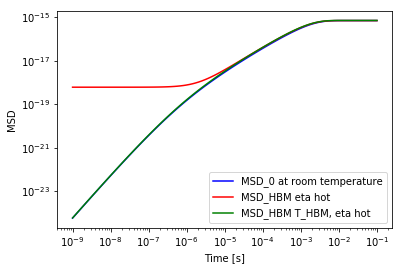

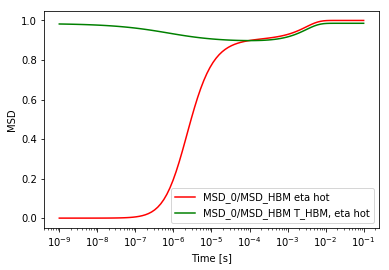

In [20]:
t = np.logspace(-9,-1,num=100)
recordtimestep = 10**-9
basis = 1.205
time = np.zeros(100)
MSDhot = np.zeros(100)
MSDhot2 = np.zeros(100)
MSDcold = np.zeros(100)
deltaMSD = np.zeros(100)
deltaMSD2 = np.zeros(100)
polyCoefscold=[tau_p+tau_f/9,-np.sqrt(tau_f),1,0,1/tau_k]
polyRootscold=np.roots(polyCoefscold);
z1cold=polyRootscold[0]
z2cold=polyRootscold[1]
z3cold=polyRootscold[2]
z4cold=polyRootscold[3]
fraction1cold=(z1cold*(z1cold-z2cold)*(z1cold-z3cold)*(z1cold-z4cold))
fraction2cold=(z2cold*(z2cold-z1cold)*(z2cold-z3cold)*(z2cold-z4cold))
fraction3cold=(z3cold*(z3cold-z1cold)*(z3cold-z2cold)*(z3cold-z4cold))
fraction4cold=(z4cold*(z4cold-z1cold)*(z4cold-z2cold)*(z4cold-z3cold))
polyCoefsn=[tau_phot+tau_fhot/9,-np.sqrt(tau_fhot),1,0,1/tau_khot]
polyRootsn=np.roots(polyCoefsn);
z1n=polyRootsn[0]
z2n=polyRootsn[1]
z3n=polyRootsn[2]
z4n=polyRootsn[3]
fraction1n=(z1n*(z1n-z2n)*(z1n-z3n)*(z1n-z4n))
fraction2n=(z2n*(z2n-z1n)*(z2n-z3n)*(z2n-z4n))
fraction3n=(z3n*(z3n-z1n)*(z3n-z2n)*(z3n-z4n))
fraction4n=(z4n*(z4n-z1n)*(z4n-z2n)*(z4n-z3n))
for i in range(100):
    time=t[i]
    term1cold=special.wofz(1j*z1cold*np.sqrt(time))/fraction1cold
    term2cold=special.wofz(1j*z2cold*np.sqrt(time))/fraction2cold
    term3cold=special.wofz(1j*z3cold*np.sqrt(time))/fraction3cold
    term4cold=special.wofz(1j*z4cold*np.sqrt(time))/fraction4cold
    MSDcold[i]=np.real(2*kB*T0/k+2*kB*T0/M_eff*(term1cold+term2cold+term3cold+term4cold))
    
    term1n=special.wofz(1j*z1n*np.sqrt(time))/fraction1n
    term2n=special.wofz(1j*z2n*np.sqrt(time))/fraction2n
    term3n=special.wofz(1j*z3n*np.sqrt(time))/fraction3n
    term4n=special.wofz(1j*z4n*np.sqrt(time))/fraction4n
    MSDhot[i]=np.real(2*kB*T0/k+2*kB*T0/M_eff*(term1n+term2n+term3n+term4n))
    
    term1n=special.wofz(1j*z1n*np.sqrt(time))/fraction1n
    term2n=special.wofz(1j*z2n*np.sqrt(time))/fraction2n
    term3n=special.wofz(1j*z3n*np.sqrt(time))/fraction3n
    term4n=special.wofz(1j*z4n*np.sqrt(time))/fraction4n
    MSDhot2[i]=np.real(2*kB*Thot/k+2*kB*Thot/M_effhot*(term1n+term2n+term3n+term4n))
    
plt.loglog(t,MSDcold,'b',label='MSD_0 at room temperature')
plt.loglog(t,MSDhot,'r',label='MSD_HBM eta hot')
plt.loglog(t,MSDhot2,'g',label='MSD_HBM T_HBM, eta hot')
plt.xlabel('Time [s]')
plt.ylabel('MSD')
plt.legend()
plt.show()

deltaMSD=MSDcold/MSDhot
deltaMSD2=MSDcold/MSDhot2

'''
print('deltaT = ',deltaT,' K')
a=min(deltaMSD)
print('Min = ',a)
a=min(deltaMSD2)
print('Min with T-dependence = ',a)
'''

plt.semilogx(t, deltaMSD,'r',label='MSD_0/MSD_HBM eta hot')
plt.semilogx(t, deltaMSD2,'g',label='MSD_0/MSD_HBM T_HBM, eta hot')
plt.xlabel('Time [s]')
plt.ylabel('MSD')
plt.legend()
plt.show()

In [22]:
%%latex
\begin{align}
\rm{MSD}_{0} (\tau _{p}, \tau _{f},T)\\
\rm{MSD}_{\rm{HBM}} (\tau _{p, \rm{HBM}}, \tau _{f, \rm{HBM}}, \tau _{k, \rm{HBM}},T) \\
\rm{MSD}_{\rm{HBM}} (\tau _{p, \rm{HBM}}, \tau _{f, \rm{HBM}}, \tau _{k, \rm{HBM}},T_{\rm{HBM}})
\end{align}

<IPython.core.display.Latex object>